In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [7]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [8]:
predicted_graph1 = pc_chen(partial_corr_test, ts, 4, 0.05)
predicted_graph2 = pc_chen_modified(partial_corr_test, ts, 4, 0.05)

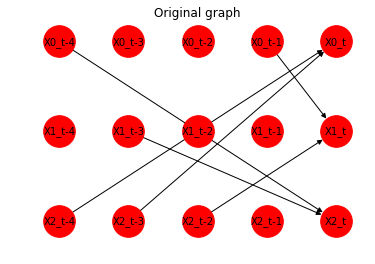

In [9]:
plt.title('Original graph')
generator.draw_graph()

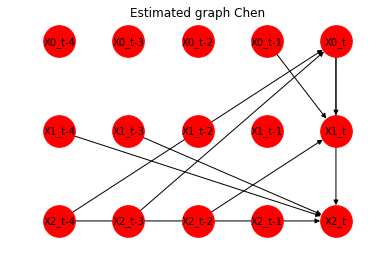

In [10]:
plt.title("Estimated graph Chen")
draw_graph(predicted_graph1, dimensions, max_p)

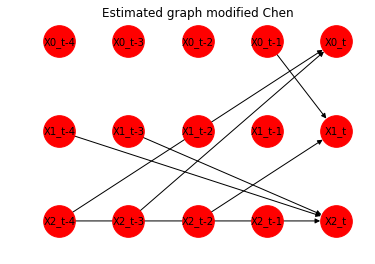

In [11]:
plt.title("Estimated graph modified Chen")
draw_graph(predicted_graph2, dimensions, max_p)

In [12]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph1), index=[0])

,FDR,FPR,TPR,accuracy,f1-score,matthews_corrcoef,precision
0,0.444444,0.019608,0.833333,0.97619,0.666667,0.669344,0.555556


In [13]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph2), index=[0])

,FDR,FPR,TPR,accuracy,f1-score,matthews_corrcoef,precision
0,0.285714,0.009804,0.833333,0.985714,0.769231,0.764316,0.714286


In [14]:
p_ranking, ic_scores = var_order_select(ts, max_p=20, drop=False)

In [15]:
pd.DataFrame(p_ranking)

,aic,bic,hqic
0,10,10,10
1,15,15,15
2,4,4,4
3,6,6,6
4,8,8,8
5,5,5,5
6,7,7,7
7,14,14,14
8,9,9,9
9,12,12,12


In [16]:
pd.DataFrame(ic_scores)

,aic,bic,hqic
0,-inf,-inf,-inf
1,-inf,-inf,-inf
2,-inf,-inf,-inf
3,-inf,-inf,-inf
4,-inf,-inf,-inf
5,-72.785742,-72.751073,-72.774006
6,-72.781996,-72.734326,-72.765858
7,-72.364883,-72.271709,-72.333341
8,-72.085301,-72.024630,-72.064762
9,-72.080440,-72.000267,-72.053299


In [23]:
graph_model = VAR(4)
mapping, data_matrix = transform_ts(ts, 4)
graph_model.fit_from_graph(3, data_matrix, generator.graph, mapping)

In [24]:
graph_model.information_criterion('bic')

-19.21756385732957

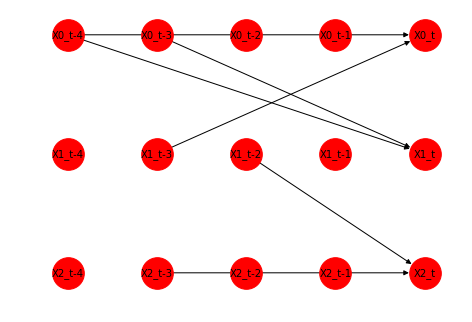

In [6]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()
generator.draw_graph()

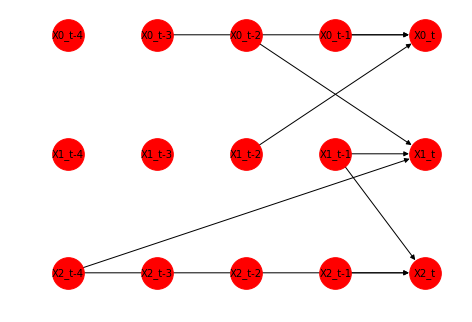

In [9]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000,
                              incoming_edges=incoming_edges, autocorrelation=0.5)
ts = generator.generate()
generator.draw_graph()